<a href="https://colab.research.google.com/github/jucca182/big_data/blob/main/gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#histograma
#setores
#Linha
#barras (horizontal e/ou vertical)
#boxplot
#dispersão

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

dados_enem2019 = pd.read_csv("https://www.dropbox.com/s/jfem9lb6rfdz315/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?dl=1")


provas =["NU_NOTA_MT","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_REDACAO"]
dados_enem2019["NU_NOTA_TOTAL"] = dados_enem2019[provas].sum(axis=1) #cria uma nova coluna somando as notas de todas as provas
#tirar os candidatos que tiraram nota zero
dados_enem2019_sem_zero = dados_enem2019.query("NU_NOTA_TOTAL != 0")

(0.0, 100.0)

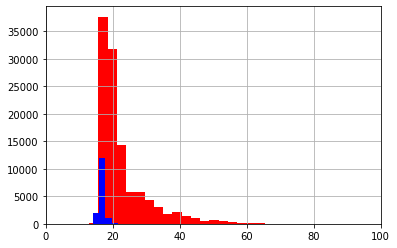

In [ ]:
#histograma
dados_enem2019.query("IN_TREINEIRO==0")["NU_IDADE"].hist(bins=25,color="red") #distribuição de idade em NÃO treineiros
dados_enem2019.query("IN_TREINEIRO==1")["NU_IDADE"].hist(bins=25,color="blue") #distribuição de idade em SIM treineiros
plt.xlim((0, 100))

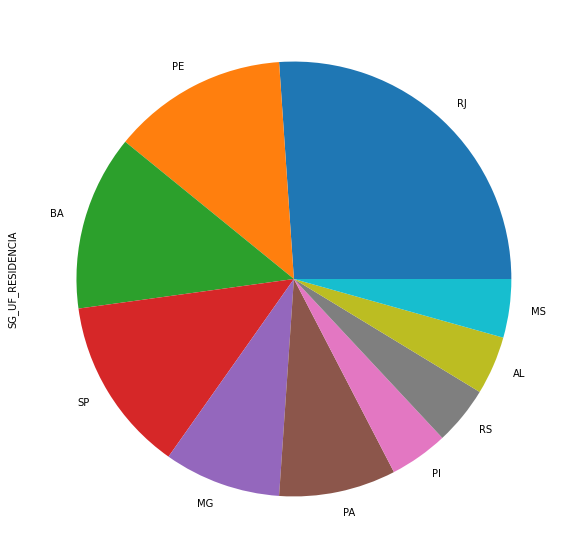

In [ ]:
#setores
candidatos_maior_cinquenta = dados_enem2019.query("NU_IDADE >= 70") 
candidatos_maior_cinquenta["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(15,10))

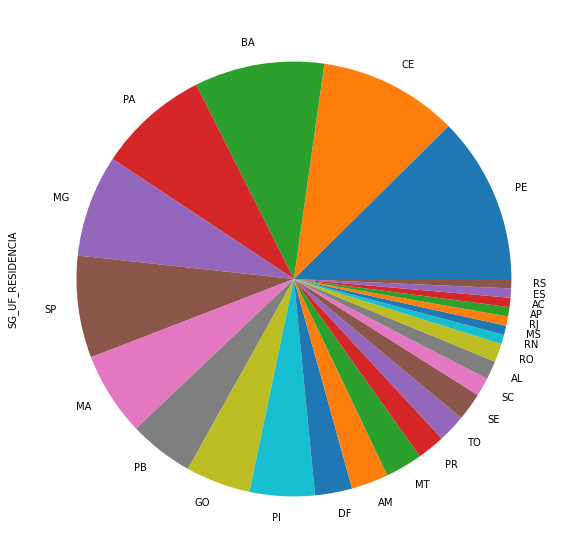

In [ ]:
#setores
cadidatos_menor_quatorze =dados_enem2019.query("NU_IDADE <= 14")
cadidatos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(15,10))

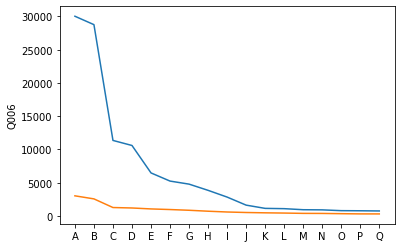

In [ ]:
#Linha

#ordem de renda, do menor para o maior : A---->Q
ordem_renda = dados_enem2019["Q006"].unique()
ordem_renda.sort()
alunos_nao_treineiro = dados_enem2019.query("IN_TREINEIRO == 0")["Q006"].value_counts()
#gráfico
sns.lineplot(x=ordem_renda,y=alunos_nao_treineiro)

alunos_sim_treineiro = dados_enem2019.query("IN_TREINEIRO == 1")["Q006"].value_counts()
#gráfico
sns.lineplot(x=ordem_renda,y=alunos_sim_treineiro)

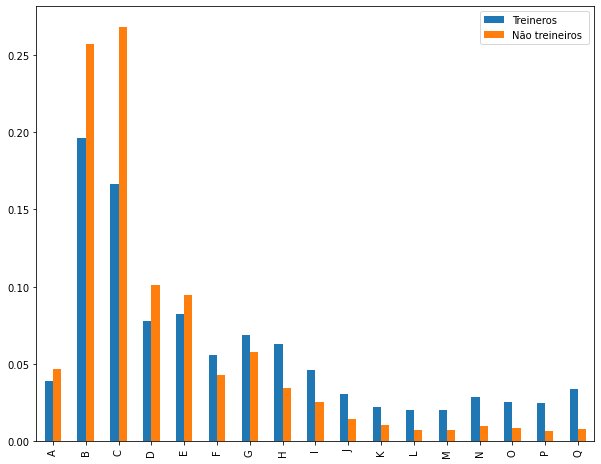

In [ ]:
#barra

#aluno que fizeram treineiro
alunos_sim_treineiro = dados_enem2019.query("IN_TREINEIRO == 1")["Q006"].value_counts(normalize=True)
#alunos que não fizeram treineiro
alunos_nao_treineiro = dados_enem2019.query("IN_TREINEIRO == 0")["Q006"].value_counts(normalize=True)

dataframe = pd.DataFrame({"Treineros" : alunos_sim_treineiro ,
                          "Não treineiros " : alunos_nao_treineiro})
dataframe.plot.bar(figsize=(10,8))
#ordem de renda, do menor para o maior : A---->Q

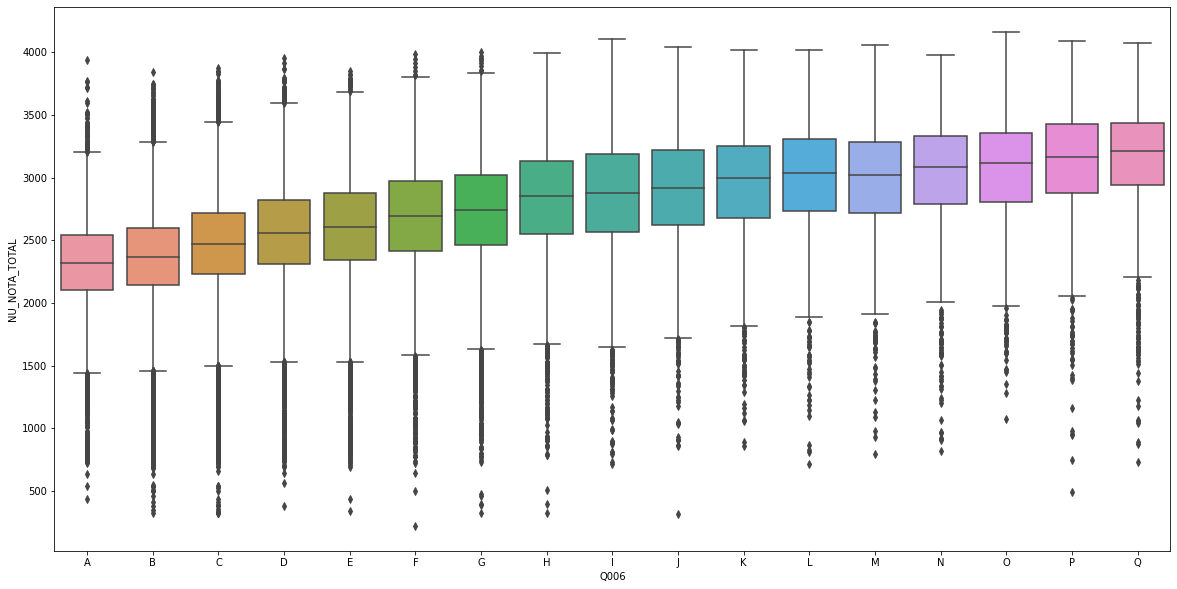

In [ ]:
#boxplot

plt.figure(figsize=(20,10))
sns.boxplot(x="Q006",y="NU_NOTA_TOTAL",data=dados_enem2019_sem_zero,order=ordem_renda)
# gráfico mostra o aumento da nota de acordo com o aumento da renda
#ordem de renda, do menor para o maior : A---->Q

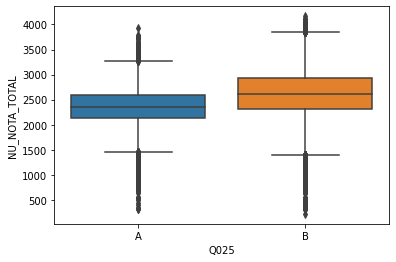

In [ ]:
#boxplot
internet_ordem=dados_enem2019_sem_zero["Q025"].unique()
internet_ordem.sort()
sns.boxplot(x="Q025",y="NU_NOTA_TOTAL",data=dados_enem2019_sem_zero,order=internet_ordem)
#A: não há acesso a internet ; B: há acesso a internet

(0.0, 1000.0)

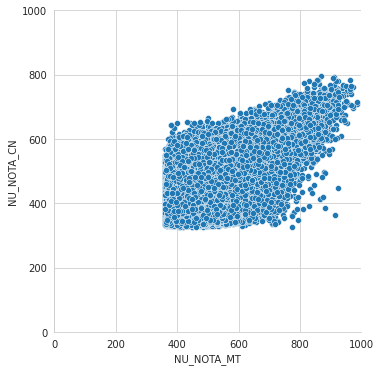

In [ ]:
#dispersão
#relplot(*[, x, y, hue, size, style, data, …])

dados_enem2019_sem_zero_cn_mt = dados_enem2019_sem_zero.query("NU_NOTA_CN != 0 and NU_NOTA_MT !=0")

sns.set_style("whitegrid")
sns.relplot(x="NU_NOTA_MT", y="NU_NOTA_CN",data=dados_enem2019_sem_zero_cn_mt)
plt.xlim((0, 1000))
plt.ylim((0, 1000))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


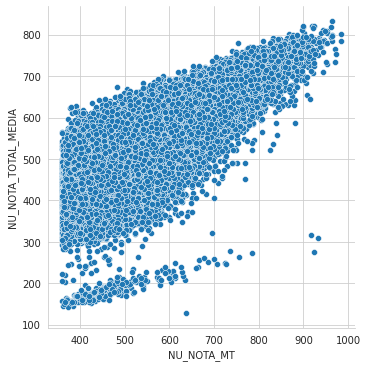

In [ ]:
#dispersão
dados_enem2019_sem_zero_cn_mt = dados_enem2019_sem_zero.query("NU_NOTA_MT !=0")
dados_enem2019_sem_zero_cn_mt["NU_NOTA_TOTAL_MEDIA"] = dados_enem2019_sem_zero_cn_mt["NU_NOTA_TOTAL"]/5
sns.relplot(x="NU_NOTA_MT", y="NU_NOTA_TOTAL_MEDIA",data=dados_enem2019_sem_zero_cn_mt)